mu = 25.811446214420034
lambda = 0.0014605519159744307
c = 0.021561727995208047


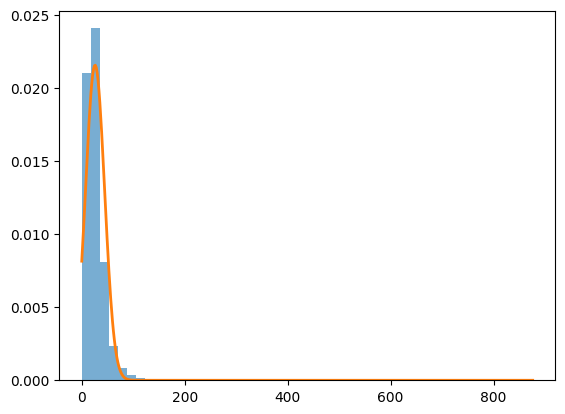

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("/content/data.csv",
                 encoding="latin1",
                 low_memory=False)
df.columns = df.columns.str.strip()
no2_col = [col for col in df.columns if col.upper() == "NO2"][0]
x = df[no2_col].dropna().values
r = 102303316
ar = 0.05 * (r % 7)
br = 0.3 * ((r % 5) + 1)
z = x + ar * np.sin(br * x)
mu = np.mean(z)
sigma2 = np.var(z)
lam = 1 / (2 * sigma2)
c = 1 / np.sqrt(2 * np.pi * sigma2)
print("mu =", mu)
print("lambda =", lam)
print("c =", c)
z_range = np.linspace(min(z), max(z), 500)
p_hat = c * np.exp(-lam * (z_range - mu)**2)

plt.hist(z, bins=50, density=True, alpha=0.6)
plt.plot(z_range, p_hat, linewidth=2)
plt.show()
